In [1]:
import pandas as pd
from pandas import ExcelWriter
from pandas import ExcelFile

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
import math
import warnings
from IPython.display import display
from sklearn import linear_model
import statsmodels.formula.api as smf

# Display preferences.
%matplotlib inline
pd.options.display.float_format = '{:.3f}'.format

# Suppress annoying harmless error.
warnings.filterwarnings(
    action="ignore",
    module="scipy",
    message="^internal gelsd"
)

In [3]:
#make the DataFrame
df = pd.read_excel('CRIME.xls', sheet_name='Sheet 1')
df.drop(df.index[:3], inplace=True)
df.drop(df.index[349:], inplace=True)

In [4]:
#grab the first row for the header
new_header = df.iloc[0] 

#take the data less the header row
df = df[1:] 

#set the header row as the df header
df.columns = new_header
 
#set new index
df.index = list(range(0, 348))

In [5]:
df.rename(columns = {'Murder and\nnonnegligent\nmanslaughter' : 'Murder', 
                     'Property\ncrime': 'Property Crime', 
                     'Larceny-\ntheft': 'Larceny Theft',
                     'Aggravated\nassault': 'Aggravated Assault',
                     'Rape\n(legacy\ndefinition)2': 'Rape (Legacy)',
                     'Motor\nvehicle\ntheft': 'Motor Vehicle Theft',
                     'Violent\ncrime': 'Violent Crime'}, 
          inplace = True)

df.drop('Rape\n(revised\ndefinition)1', axis = 1, inplace = True)


In [6]:
df.head(10)

3,City,Population,Violent Crime,Murder,Rape (Legacy),Robbery,Aggravated Assault,Property Crime,Burglary,Larceny Theft,Motor Vehicle Theft,Arson3
0,Adams Village,1861,0,0,0,0,0,12,2,10,0,0
1,Addison Town and Village,2577,3,0,0,0,3,24,3,20,1,0
2,Akron Village,2846,3,0,0,0,3,16,1,15,0,0
3,Albany,97956,791,8,30,227,526,4090,705,3243,142,NaN
4,Albion Village,6388,23,0,3,4,16,223,53,165,5,NaN
5,Alfred Village,4089,5,0,0,3,2,46,10,36,0,NaN
6,Allegany Village,1781,3,0,0,0,3,10,0,10,0,0
7,Amherst Town,118296,107,1,7,31,68,2118,204,1882,32,3
8,Amityville Village,9519,9,0,2,4,3,210,16,188,6,1
9,Amsterdam,18182,30,0,0,12,18,405,99,291,15,0


In [7]:
#make a relevant features DataFrame
features = pd.DataFrame()

#Add Relevant Features
features['Pop'] = df['Population']
features['Pop^2'] = df['Population'] * df['Population']
features['Murder'] = df['Murder'].where(df['Murder'] == 0, 1)
features['Robbery'] = df['Robbery'].where(df['Robbery'] == 0, 1)

In [8]:
features.head(10)

,Pop,Pop^2,Murder,Robbery
0,1861,3463321,0,0
1,2577,6640929,0,0
2,2846,8099716,0,0
3,97956,9595377936,1,1
4,6388,40806544,0,1
5,4089,16719921,0,1
6,1781,3171961,0,0
7,118296,13993943616,1,1
8,9519,90611361,0,1
9,18182,330585124,0,1


In [9]:
#Define Variables for Model
#Start w/ Features
X = features
#Then Outcome
y = df.loc[:, 'Property Crime']

In [10]:
# Instantiate and fit our model.
regr = linear_model.LinearRegression()
regr.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [11]:
# Inspect the results.
print('\nCoefficients: \n', regr.coef_)
print('\nIntercept: \n', regr.intercept_)
print('\nR-squared:')
print(regr.score(X, y))


Coefficients: 
 [ 3.46570268e-02 -2.11108019e-09  1.51866535e+01 -9.62774363e+01]

Intercept: 
 -109.57533562257424

R-squared:
0.9961247104988709


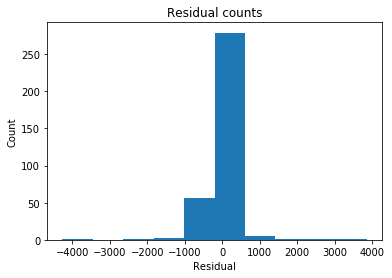

In [32]:
# Extract predicted values for original model.
predicted = regr.predict(X).ravel()
actual = y.values

# Calculate the error, also called the residual.
residual = actual - predicted
residual = residual.reshape(-1,1)

# This looks a bit concerning.
plt.hist(residual)
plt.title('Residual counts')
plt.xlabel('Residual')
plt.ylabel('Count')
plt.show()

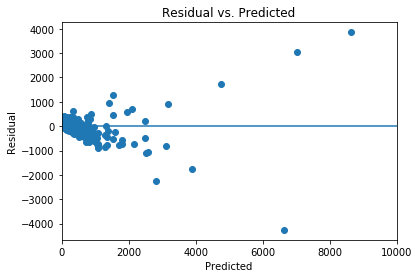

In [37]:
plt.scatter(predicted, residual)
plt.xlabel('Predicted')
plt.ylabel('Residual')
plt.axhline(y=0)
plt.title('Residual vs. Predicted')
#Currently 0 to 140,000
xmin = 0
xmax = 10000
plt.xlim((xmin, xmax)) 
plt.show()

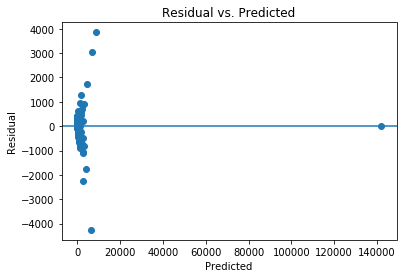

In [38]:
plt.scatter(predicted, residual)
plt.xlabel('Predicted')
plt.ylabel('Residual')
plt.axhline(y=0)
plt.title('Residual vs. Predicted')
plt.show()